控制饮食情况下的正常代谢
[99.875, 99.628125, 99.262421875, 98.780861328125, 98.18633979492188, 97.48168130004883, 96.66963926754761, 95.75289828585892, 94.73407582871245, 93.61572393299464]
k=33时,w(33)=74.9888
控制饮食+大量运动后的变化
[99.375, 98.64375, 97.8094375, 96.875154375, 95.84389974374999, 94.71858275143748, 93.50202526889436, 92.19696451082753, 90.8060555755027, 89.33187390823761]
k=23时,w(23)=74.7388
控制饮食+适量运动后的变化
[99.625, 99.1353125, 98.53409140625, 97.82440389257813, 97.00923278553223, 96.0914788839301, 95.07396321462203, 93.95942922621992, 92.75054492249888, 91.44990493713016]
k=27时,w(27)=74.8952


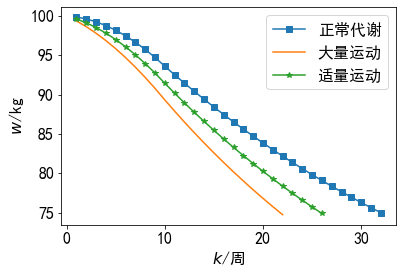

In [28]:
#13.1

'''
不满足
在只进行饮食控制，不进行运动时，可以满足；但是需要进行运动控制
要求每周体重减少不超过1kg，主要控制运动量
体重变化依然正比于吸收的热量，a = 1/8000
可知代谢消耗系数依然未变 B = 0.025
'''
'''
题目并没有表达清楚！
其实题目本意是两种控制方法：1、只控制饮食，2、控制饮食+运动
'''
'''
可以将yt改为20，B+ayt = 0.025+20/8000=0.0275
最终第一阶段的体重末值为91.4499，平均下降不到1kg
但是最终需要增加4天控制才能减肥成功
'''
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='SimHei'); plt.rc('font',size=16)
def fun(delta,*s):
    w=100; tw=[]
    for k in range(1,11):
        w=delta*w+2.5-0.125*k; tw.append(w)
    print(tw); w2=tw[-1]  #提取第二阶段的初值
    tw2=[];k =11
    while w2>=75:
        k+=1; w2=delta*w2+1.25;
        tw2.append(w2); tw.append(w2)
    print("k=%d时,w(%d)=%.4f"%(k,k,w2))
    plt.plot(np.arange(1,len(tw)+1),tw,s[0])  #传入的s是tuple类型

print('控制饮食情况下的正常代谢')
fun(0.975,"s-")
print('控制饮食+大量运动后的变化')
fun(0.97,"-")
print('控制饮食+适量运动后的变化')
fun(0.9725,"*-")
plt.legend(("正常代谢","大量运动","适量运动"))
plt.xlabel("$k$/周"); plt.ylabel("$w$/kg")
plt.show()

C0*(r + 1)**n - b/r


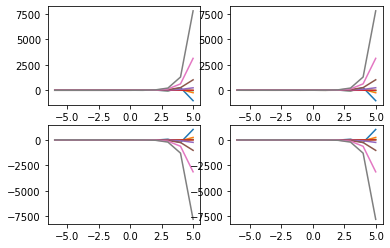

In [23]:
#13.2

'''
主要分析平衡点和稳定性
题中方程无法求特解
'''
'''
x(k+1)-(1+r)x(k)=b
假设k=a是平衡点，则x(a)=-b/r
方程的通解为x(k)=C*(1+r)**k-b/r,r != 0;x(k) = C+bt,r =0
因为规定r和b是非零常数，所以最终方程的通解为x(k)=C*(1+r)**k-b/r
'''
'''
最终发现，从长远角度来看，r值对最终的函数值具有重要影响，b的值从长远角度而言并没有对函数值有太大的影响
最终函数都有相应的转折点（平衡点）
'''
#将r，b看作变量
import sympy as sym
import matplotlib.pyplot as plt
from sympy.abc import n
r,b = sym.symbols('r b', real = True, constant = True,Nonzero = True)
x = sym.Function('x')
f = x(n+1)-(1+r)*x(n)-b
ff = sym.rsolve(f,x(n))
print(ff)
#假定c0 = 1或者-1
#c0 = 1
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)
for i in [-5,-4,-3,-2,2,3,4,5]:
    r = i
    for j in [5]:
        b = j
        func = lambda k:(1+r)**k-b/r
        value = []
        for k in range(-6,6):
            value.append(func(k))
        ax1.plot(range(-6,6),value)
for i in [-5,-4,-3,-2,2,3,4,5]:
    r = i
    for j in [-5]:
        b = j
        func = lambda k:(1+r)**k-b/r
        value = []
        for k in range(-6,6):
            value.append(func(k))
        ax2.plot(range(-6,6),value)
#c0 = -1
for i in [-5,-4,-3,-2,2,3,4,5]:
    r = i
    for j in [5]:
        b = j
        func = lambda k:-((1+r)**k-b/r)
        value = []
        for k in range(-6,6):
            value.append(func(k))
        ax3.plot(range(-6,6),value)
for i in [-5,-4,-3,-2,2,3,4,5]:
    r = i
    for j in [-5]:
        b = j
        func = lambda k:-((1+r)**k-b/r)
        value = []
        for k in range(-6,6):
            value.append(func(k))
        ax4.plot(range(-6,6),value)

问题1 **********
C0*(r + 1)**k
较好自然环境下数量变化为： [102, 103, 105, 107, 109, 111, 112, 114, 116, 118, 120, 122, 124, 126, 128, 131, 133, 135, 137, 140, 142, 144, 147, 149, 152]
中等自然环境下数量变化为： [101, 101, 102, 102, 103, 103, 104, 104, 105, 106, 106, 107, 107, 108, 109, 109, 110, 110, 111, 112, 112, 113, 113, 114, 115]
较差自然环境下数量变化为： [96, 91, 87, 83, 79, 76, 72, 69, 66, 63, 60, 58, 55, 52, 50, 48, 46, 44, 42, 40, 38, 36, 35, 33, 32]
问题2 **********
C0*(r + 1)**k + 3/r
较好自然环境下数量变化为： [99, 97, 96, 95, 93, 92, 90, 89, 87, 86, 84, 83, 81, 79, 78, 76, 74, 73, 71, 69, 67, 65, 63, 61, 59]
中等自然环境下数量变化为： [98, 95, 93, 90, 88, 85, 83, 80, 77, 75, 72, 70, 67, 64, 62, 59, 56, 54, 51, 48, 46, 43, 40, 37, 35]
较差自然环境下数量变化为： [92, 85, 78, 72, 66, 60, 54, 49, 43, 39, 34, 29, 25, 21, 17, 13, 10, 6, 3, 0, -3, -6, -9, -11, -14]
问题3 **********


'\n由于问题1可知，在较好及中等环境下，山猫的数量呈几何级数无限增长\n令x(k+1)=x(k),即可以求出平衡点 x= -b/r\n则每年人工繁殖b = -60*（-0.045）=2.7，则取整为3只\n所以最终需要人工繁殖3只，可以将种群稳定在60附近\n'

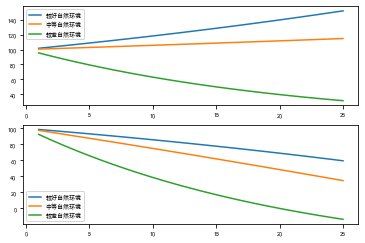

In [79]:
#13.3

'''
总体可列出公式x(k+1)=(1+r)*x(k),k = 0,1,2...
c0 = x0 = 100
'''

import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from sympy.abc import k
r = sym.symbols('r', real = True, constant = True)
x = sym.Function('x')
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
print('问题1','*'*10)

#问题1
'''
问题1：在25年内较好和中等环境下都在稳定增长数量趋于无穷，较差环境下数量下降趋于0
'''
f = x(k+1)-(1+r)*x(k)
ff = sym.rsolve(f,x(k))
print(ff)#查看解的情况
func = lambda r,k:100*(1+r)**k
listr = [0.0168,0.0055,-0.045]
for i in listr:
    mount = []
    for j in range(1,26):
        mount.append(func(i,j))
    if i == listr[0]:
        ax1.plot(range(1,26),mount,label = '较好自然环境')
        print('较好自然环境下数量变化为：',[int(np.round(i,0)) for i in mount])
    elif i == listr[1]:
        ax1.plot(range(1,26),mount,label = '中等自然环境')
        print('中等自然环境下数量变化为：',[int(np.round(i,0)) for i in mount])
    else:
        ax1.plot(range(1,26),mount,label = '较差自然环境')
        print('较差自然环境下数量变化为：',[int(np.round(i,0)) for i in mount])
ax1.legend(loc = 'best')
plt.rc('font',size = 6);plt.rc('font',family = 'SimHei')

#问题2
'''
问题2：在25年内数量都会下降趋于0，较差环境下该物种在25年内会灭绝
利用sympy求方程解时，发现有问题，最终根据人工算出来的解进行计算
'''
print('问题2','*'*10)
f2 = x(k+1)-(1+r)*x(k)+3
ff2 = sym.rsolve(f2,x(k))
print(ff2)#查看解的情况
func2 = lambda r,k:100*(1+r)**k+3/r*(1-(1+r)**k)
listr2 = [0.0168,0.0055,-0.045]
for i in listr2:
    mount2 = []
    for j in range(1,26):
        mount2.append(func2(i,j))
    if i == listr2[0]:
        ax2.plot(range(1,26),mount2,label = '较好自然环境')
        print('较好自然环境下数量变化为：',[int(np.round(i,0)) for i in mount2])
    elif i == listr2[1]:
        ax2.plot(range(1,26),mount2,label = '中等自然环境')
        print('中等自然环境下数量变化为：',[int(np.round(i,0)) for i in mount2])
    else:
        ax2.plot(range(1,26),mount2,label = '较差自然环境')
        print('较差自然环境下数量变化为：',[int(np.round(i,0)) for i in mount2])
ax2.legend(loc = 'best')

#问题3
print('问题3','*'*10)
'''
由于问题1可知，在较好及中等环境下，山猫的数量呈几何级数无限增长
令x(k+1)=x(k),即可以求出平衡点 x= -b/r
则每年人工繁殖b = -60*（-0.045）=2.7，则取整为3只
所以最终需要人工繁殖3只，可以将种群稳定在60附近
'''

In [84]:
#13.4

'''
标准的差分方程模型
A(k+1)=(1+r)*A(k)-b，求解得A(k)=A(0)*(1+r)**k+b/r(1-(1+r)**k)
需求：1、计算A(k)=0的时间 2、每月支出1000元，在月利率0.3%的情况下，使用至80岁
'''
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font',family = 'SimHei')
#问题1 要求A(k)=0
a = 100000
yue = []
r = 0.003
b = 1000
for i in range(1,1000):
    a = (1+r)*a-b
    yue.append(a)
    if a<1000:
        print('可供老人使用{}个月,约{}年'.format(i,i/12))
        print(yue)
        break
    else:
        continue
#问题2 要求用到60岁n=(80-60)*12=240,即要求A(240) = 0
cunkuan = 1000*((1+0.003)**240-1)/(0.003*(1+0.003)**240)
print('需要存{}元'.format(cunkuan))

可供老人使用119个月,约9.916666666666666年
[99299.99999999999, 98597.89999999998, 97893.69369999997, 97187.37478109996, 96478.93690544325, 95768.37371615956, 95055.67883730803, 94340.84587381996, 93623.8684114414, 92904.74001667571, 92183.45423672574, 91460.00459943591, 90734.3846132342, 90006.5877670739, 89276.60753037511, 88544.43735296623, 87810.07066502511, 87073.50087702017, 86334.72137965122, 85593.72554379016, 84850.50672042153, 84105.05824058279, 83357.37341530452, 82607.44553555043, 81855.26787215707, 81100.83367577354, 80344.13617680085, 79585.16858533124, 78823.92409108722, 78060.39586336048, 77294.57705095055, 76526.4607821034, 75756.0401644497, 74983.30828494305, 74208.25820979787, 73430.88298442725, 72651.17563338052, 71869.12916028066, 71084.7365477615, 70297.99075740477, 69508.88472967698, 68717.41138386601, 67923.56361801761, 67127.33430887165, 66328.71631179826, 65527.70246073365, 64724.28556811584, 63918.45842482018, 63110.213800094636, 62299.544441494916, 61486.44307481939, 60

In [ ]:
#13.5

'''
S(n+1) = y%*I(n)+(1-z%)*S(n)
I(n+1) = z%*s(n)+(1-x%)I(n)
R(n+1) = y%*I(n)
'''
#题目并没有给出相应的x，y，z的值
#参考相应的文档，最终健康和患者人数应该是稳定的状态

TX= [[   35.2           33.44          31.768         37.1492
     41.91286       46.107281      51.15745855    56.8983319
     63.18265695    70.15270089    77.91093556    86.52555486
     96.08951189   106.71140154   118.50789133   131.60822011
    146.15666661   162.31339577   180.25615356   200.18236587
    222.31129994   246.88645335   274.17823912   304.48696455
    338.14613409   375.52611873   417.03823178   463.13925474
    514.33646351   571.19321023   634.33512215   704.45698582
    782.33039215   868.81222673   964.85409859  1071.5128113
   1189.96199163  1321.50500357  1467.58929003  1629.82229987
   1809.98917558  2010.07239623  2232.27359179  2479.03776897
   2753.08021497  3057.4163754   3395.39503489  3770.73516571
   4187.56684975  4650.47672417]
 [    0.            21.12          20.064         19.0608
     22.28952       25.147716      27.6643686     30.69447513
     34.13899914    37.90959417    42.09162053    46.74656134
     51.91533292    57.65370714    64.02684

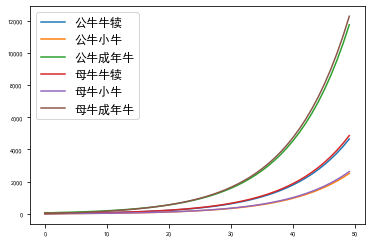

特征值= [ 0.95      +0.j          0.        +0.j          0.        +0.j
  1.11054388+0.j         -0.08027194+0.41454485j -0.08027194-0.41454485j] 
特征向量为：
 [[ 0.00000000e+000+0.00000000e+00j  0.00000000e+000+0.00000000e+00j
   0.00000000e+000+0.00000000e+00j -2.49711587e-001+0.00000000e+00j
  -6.62008564e-002+3.41878181e-01j -6.62008564e-002-3.41878181e-01j]
 [ 0.00000000e+000+0.00000000e+00j  0.00000000e+000+0.00000000e+00j
   0.00000000e+000+0.00000000e+00j -1.34913131e-001+0.00000000e+00j
   4.94824401e-001-1.45716772e-16j  4.94824401e-001+1.45716772e-16j]
 [ 0.00000000e+000+0.00000000e+00j  0.00000000e+000+0.00000000e+00j
   0.00000000e+000+0.00000000e+00j -6.30262895e-001+0.00000000e+00j
  -3.10022203e-001-1.24741929e-01j -3.10022203e-001+1.24741929e-01j]
 [ 0.00000000e+000+0.00000000e+00j  0.00000000e+000+0.00000000e+00j
   7.86518602e-292+0.00000000e+00j -2.61062113e-001+0.00000000e+00j
  -6.92099862e-002+3.57418098e-01j -6.92099862e-002-3.57418098e-01j]
 [ 0.00000000e+000+0.000000

<BarContainer object of 6 artists>

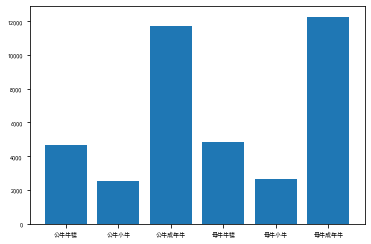

In [101]:
#13.6

'''
该种群变化的原因就在于母牛每年生育0.44头雌性，0.46头雄性
x(t)=[x1(t),x2(t),x3(t)]表示各阶段雌性野牛分布情况
y(t)=[y1(t),y2(t),y3(t)]表示各阶段雄性野牛分布情况
z(t)=[x1(t),x2(t),x3(t),y1(t),y2(t),y3(t)]表示t时刻各年龄组雌雄性分布情况
z(t+1)=pz(t),z(0) = [0,0,80,0,0,20]
'''
'''
x1(t+1)=0.44*x3(t)
x2(t+1)=0.6*x1(t)
x3(t+1)=0.75*x2(t)+0.95*x3(t)
y1(t+1)=0.46x3(t)
y2(t+1)=0.6y1(t)
y3(t+1)=0.75*y2(t)+0.95*y3(t)
'''
'''
最终成年公牛和成年母牛数量不断稳定，并且各个整体趋势都是不断增加
'''
import numpy as np
import matplotlib.pyplot as plt
p = np.array([[0,0,0.44,0,0,0],
              [0.6,0,0,0,0,0],
              [0,0.75,0.95,0,0,0],
              [0,0,0.46,0,0,0],
              [0,0,0,0.6,0,0],
              [0,0,0,0,0.75,0.95]])
x=np.array([0,0,80,0,0,20])
TX=np.zeros((6,50))
for i in range(50):
    x=p.dot(x)
    TX[:,i]=x.flatten()
print("TX=",TX)
labelniu = ['公牛牛犊','公牛小牛','公牛成年牛','母牛牛犊','母牛小牛','母牛成年牛']
for i in range(6):
    plt.plot(TX[i],label = labelniu[i] )
plt.legend(loc = 'best',fontsize = 12)
plt.show()
val,vec = np.linalg.eig(p)#计算特征值和特征向量
cv=(np.linalg.inv(vec)).dot(x); c=abs(cv[0])
print("特征值=",val,"\n特征向量为：\n",vec,'\nc=',c)
fenbu = list(TX[:,49])
print(fenbu)
plt.bar(labelniu,fenbu)